# HW4

In [1]:
#import package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from numpy import linalg as LA
import scipy.stats.mstats as sci

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA

from sklearn.datasets import load_wine

In [2]:
#Problem 1.1
w, v = LA.eig(np.array([[16, 5], [5, 9]]))
eigenvalue=np.roots([1, -25, 119])
v

array([[ 0.88697868, -0.46181038],
       [ 0.46181038,  0.88697868]])

In [3]:
#Problem 1.2
18.60328/(18.60328+6.39672)

0.7441312000000001

In [5]:
#Problem 1.3
y=np.dot([[5,4]],v)
y

array([[6.2821349, 1.2388628]])

In [6]:
#Problem 2.1
iris_csv = pd.read_csv('iris.txt',header = None,  index_col = None)
iris = np.asanyarray(iris_csv) 
iris_sl=iris[:,0]
iris_sw=iris[:,1]
iris_pl=iris[:,2]
iris_pw=iris[:,3]
#normalization
meansl = np.mean(iris_sl, axis = 0)
stdsl = np.std(iris_sl, axis = 0)
iris_sl_z =np.array([(iris_sl -meansl)/stdsl])

meansw = np.mean(iris_sw, axis = 0)
stdsw = np.std(iris_sw, axis = 0)
iris_sw_z = np.array([(iris_sw -meansw)/stdsw])

meanpl = np.mean(iris_pl, axis = 0)
stdpl = np.std(iris_pl, axis = 0)
iris_pl_z = np.array([(iris_pl -meanpl)/stdpl])

meanpw = np.mean(iris_pw, axis = 0)
stdpw = np.std(iris_pw, axis = 0)
iris_pw_z = np.array([(iris_pw -meanpw)/stdpw])

iris_z = np.hstack((iris_sl_z.T,iris_sw_z.T,iris_pl_z.T,iris_pw_z.T))
iris_zt=np.array(np.vstack((iris_sl_z,iris_sw_z,iris_pl_z,iris_pw_z)), dtype=np.float64)
w2, v2 = LA.eig(np.cov(iris_zt))
v2

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

[0.72770452 0.23030523 0.03683832 0.00515193]


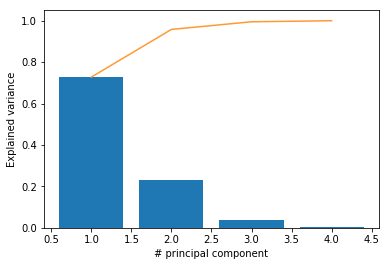

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [228]:
#Problem 2.2
pca = PCA(n_components=4)
pca.fit(iris_z)
expvar = pca.explained_variance_ratio_ 
def scree_plot(expvar):
    cumvar = []
    for i in range(0, 4):
        cumvar.append(sum(expvar[0:i+1]))
    print(expvar)
    plt.plot(np.arange(1, 5), cumvar, color='#ff9932')
    plt.bar(np.arange(1, 5), expvar)
    plt.xlabel('# principal component')
    plt.ylabel('Explained variance')
    plt.show()

scree_plot(expvar)

In [9]:
#Problem 2.3
pca = PCA(n_components=3) # initialize pca object with number of dimensions
X_r = pca.fit_transform(iris_z) # compute the PCA and reduce dimensions
Y=iris[:,4]

Iris_setosa = go.Scatter3d(x=X_r[Y=='Iris-setosa', 0],y=X_r[Y=='Iris-setosa', 1],z=X_r[Y=='Iris-setosa', 2],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='#1f77b4',
            width=0.5
        ),
        opacity=0.8),
        name='Iris-setosa')
Iris_versicolor = go.Scatter3d(x=X_r[Y=='Iris-versicolor', 0],y=X_r[Y=='Iris-versicolor', 1],z=X_r[Y=='Iris-versicolor', 2],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='#ff7f0e',
            width=0.5
        ),
        opacity=0.8),
        name='Iris-versicolor')
Iris_virginica = go.Scatter3d(x=X_r[Y=='Iris-virginica', 0],y=X_r[Y=='Iris-virginica', 1],z=X_r[Y=='Iris-virginica', 2],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='#2ca02c',
            width=0.5
        ),
        opacity=0.8),
      name='Iris-virginica')
data = [Iris_setosa, Iris_versicolor, Iris_virginica]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple-3d-scatter')

In [20]:
#Problem 2.4
iris_nz =iris[:, :-1]
iris_nz=np.array(iris_nz, dtype=np.float64)

wn, vn = LA.eig(np.cov(iris_nz.T))
np.cov(iris_nz.T)
vn

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

[0.92461621 0.05301557 0.01718514 0.00518309]


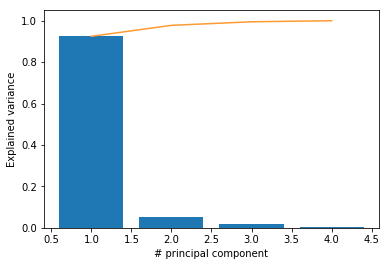

In [254]:
pcan = PCA(n_components=4)
pcan.fit(iris_nz)
expvar = pcan.explained_variance_ratio_ 
def scree_plot(expvar):
    cumvar = []
    for i in range(0, 4):
        cumvar.append(sum(expvar[0:i+1]))
    print(expvar)
    plt.plot(np.arange(1, 5), cumvar, color='#ff9932')
    plt.bar(np.arange(1, 5), expvar)
    plt.xlabel('# principal component')
    plt.ylabel('Explained variance')
    plt.show()

scree_plot(expvar)

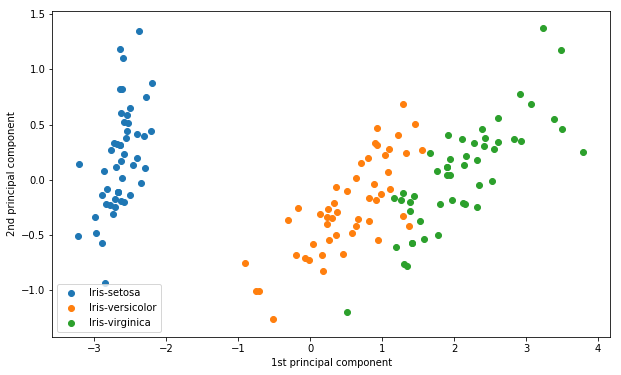

In [269]:
pca = PCA(n_components=2) # initialize pca object with number of dimensions
X_rn = pca.fit_transform(iris_nz) # compute the PCA and reduce dimensions
Y=iris[:,4]


fig = plt.figure(figsize=(10, 6))
plt.scatter(X_rn[Y=='Iris-setosa', 0], X_rn[Y=='Iris-setosa', 1], label='Iris-setosa')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.legend()

plt.scatter(X_rn[Y=='Iris-versicolor', 0], X_rn[Y=='Iris-versicolor', 1], label='Iris-versicolor')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.legend()

plt.scatter(X_rn[Y=='Iris-virginica', 0], X_rn[Y=='Iris-virginica', 1], label='Iris-virginica')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.legend()

Text(0.5,1,'Signal')

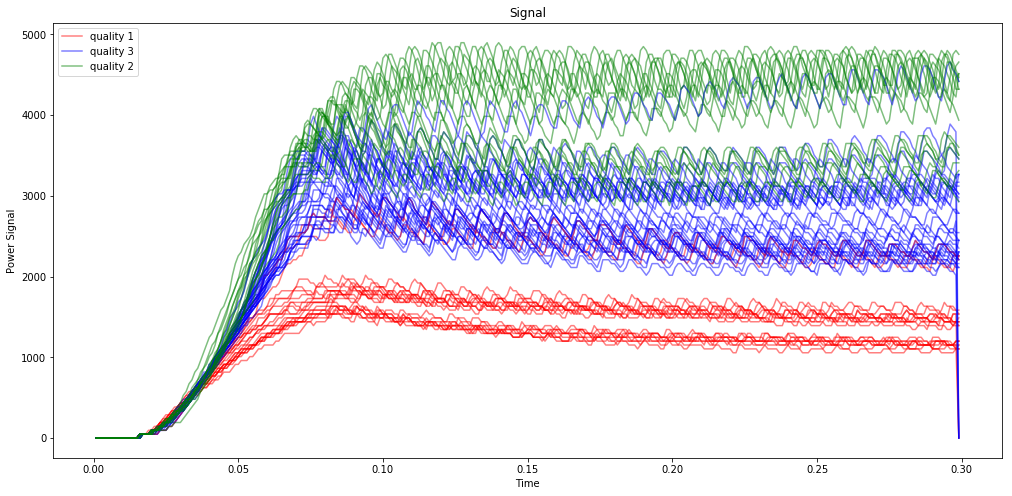

In [161]:
#Problem3.1
weld_quality = pd.read_csv('weld_quality.csv',header = 0,  index_col = None) # Read .csv file with pandas
# print(welding_dataf.head)
quality_array = np.asanyarray(weld_quality) # Convert pandas dataframe as numpy array
weld_signal = pd.read_csv('weld_signal.csv',header = None,  index_col = None) # Read .csv file with pandas
# print(welding_dataf.head)
signal_array = np.asanyarray(weld_signal) # Convert pandas dataframe as numpy array
plt.figure(figsize=(17,8))
t1=t2=t3=0
time=np.arange(1,300)
time=time/1000
for i in range(0,70):
    if quality_array[i,1]==1:
        if t1 ==0 :
            plt.plot(time,signal_array[i,:],'-',color = 'r',label="quality 1",alpha=0.5)
            t1=1
        else:
            plt.plot(time,signal_array[i,:],'-',color = 'r',alpha=0.5)
    if quality_array[i,1]==2:
        if t2 ==0 :
            plt.plot(time,signal_array[i,:],'-',color = 'g',label="quality 2",alpha=0.5)
            t2=1
        else:
            plt.plot(time,signal_array[i,:],'-',color = 'g',alpha=0.5)
    if quality_array[i,1]==3:
        if t3 ==0 :
            plt.plot(time,signal_array[i,:],'-',color = 'b',label="quality 3",alpha=0.5)
            t3=1
        else:
            plt.plot(time,signal_array[i,:],'-',color = 'b',alpha=0.5)
            
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.ylabel("Power Signal")
plt.title("Signal")

In [162]:
meansi = np.mean(signal_array, axis = 0)
stdsi = np.std (signal_array, axis = 0)
#jb=[[1,2,3],[2,5,6]]
#stdv = np.std (jb, axis = 0)
for i in range(0,len(stdsi)):
    if stdsi[i]==0:
        stdsi[i]=1
signal_z = (signal_array - meansi)/stdsi
signal_z

array([[ 0.        ,  0.        ,  0.        , ..., -0.34707387,
        -0.34235008, -0.16120832],
       [ 0.        ,  0.        ,  0.        , ..., -1.46977124,
        -1.42958662, -1.04102324],
       [ 0.        ,  0.        ,  0.        , ..., -1.37995545,
        -1.33898357, -0.9645176 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.80850508,
         1.74151996,  1.52191587],
       [ 0.        ,  0.        ,  0.        , ...,  1.49414981,
         1.74151996,  1.67492716],
       [ 0.        ,  0.        ,  0.        , ...,  1.89832087,
         1.832123  ,  1.63667433]])

In [163]:
signal_z

array([[ 0.        ,  0.        ,  0.        , ..., -0.34707387,
        -0.34235008, -0.16120832],
       [ 0.        ,  0.        ,  0.        , ..., -1.46977124,
        -1.42958662, -1.04102324],
       [ 0.        ,  0.        ,  0.        , ..., -1.37995545,
        -1.33898357, -0.9645176 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.80850508,
         1.74151996,  1.52191587],
       [ 0.        ,  0.        ,  0.        , ...,  1.49414981,
         1.74151996,  1.67492716],
       [ 0.        ,  0.        ,  0.        , ...,  1.89832087,
         1.832123  ,  1.63667433]])

[0.90099501 0.0418611  0.02174381 0.00800594 0.00403913]


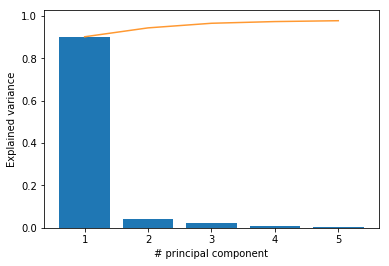

In [164]:
#Problem3.2(a)
meansi = np.mean(signal_array, axis = 0)
stdsi = np.std (signal_array, axis = 0)
#jb=[[1,2,3],[2,5,6]]
#stdv = np.std (jb, axis = 0)
for i in range(0,len(stdsi)):
    if stdsi[i]==0:
        stdsi[i]=1
signal_z = (signal_array - meansi)/stdsi




pca3 = PCA(n_components=5)
pca3.fit(signal_z)
expvar3 = pca3.explained_variance_ratio_ 
def scree_plot(expvar):
    cumvar = []
    for i in range(0, 5):
        cumvar.append(sum(expvar[0:i+1]))
    print(expvar)
    plt.plot(np.arange(1, 6), cumvar, color='#ff9932')
    plt.bar(np.arange(1, 6), expvar)
    plt.xlabel('# principal component')
    plt.ylabel('Explained variance')
    plt.show()

scree_plot(expvar3)


In [469]:
quality_array

array([[ 1,  1],
       [ 2,  1],
       [ 3,  1],
       [ 4,  1],
       [ 5,  1],
       [ 6,  1],
       [ 7,  1],
       [ 8,  1],
       [ 9,  1],
       [10,  1],
       [11,  1],
       [12,  1],
       [13,  1],
       [14,  1],
       [15,  1],
       [16,  1],
       [17,  1],
       [18,  1],
       [19,  1],
       [20,  1],
       [21,  3],
       [22,  1],
       [23,  3],
       [24,  3],
       [25,  3],
       [26,  3],
       [27,  3],
       [28,  3],
       [29,  3],
       [30,  1],
       [31,  3],
       [32,  3],
       [33,  3],
       [34,  3],
       [35,  3],
       [36,  3],
       [37,  3],
       [38,  3],
       [39,  3],
       [40,  3],
       [41,  3],
       [42,  3],
       [43,  3],
       [44,  3],
       [45,  3],
       [46,  3],
       [47,  3],
       [48,  3],
       [49,  3],
       [50,  3],
       [51,  3],
       [52,  3],
       [53,  2],
       [54,  2],
       [55,  2],
       [56,  3],
       [57,  2],
       [58,  2],
       [59,  2

In [180]:
#Problem3.2(b)
pca3 = PCA(n_components=3) # initialize pca object with number of dimensions
X_r3 = pca3.fit_transform(signal_z) # compute the PCA and reduce dimensions
Y3=quality_array[:,1]

qual1 = go.Scatter3d(x=X_r3[Y3==1, 0],y=X_r3[Y3==1, 1],z=X_r3[Y3==1, 2],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='#1f77b4',
            width=0.5
        ),
        opacity=0.8),
        name='quality1')
qual2 = go.Scatter3d(x=X_r3[Y3==2, 0],y=X_r3[Y3==2, 1],z=X_r3[Y3==2, 2],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='#ff7f0e',
            width=0.5
        ),
        opacity=0.8),
        name='quality2')
qual3 = go.Scatter3d(x=X_r3[Y3==3, 0],y=X_r3[Y3==3, 1],z=X_r3[Y3==3, 2], 
    mode='markers',                
    marker=dict(
        size=12,
        line=dict(
            color='#2ca02c',
            width=0.5
        ),
        opacity=0.8),
      name='quality3')
data = [qual1, qual2, qual3]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)


iplot(fig, filename='simple-3d-scatter')



IndexError: index 43 is out of bounds for axis 1 with size 2

In [158]:
#Problem3.3
extraline=np.vstack(([signal_array[:,209]],[signal_array[:,210]],[signal_array[:,211]],[signal_array[:,212]],[signal_array[:,213]],[signal_array[:,214]],[signal_array[:,215]],[signal_array[:,216]],[signal_array[:,217]],[signal_array[:,218]],[signal_array[:,219]],[signal_array[:,220]]))
#extraline=extraline.T

max_ar=np.max(extraline,axis=0)
min_ar=np.min(extraline,axis=0)
mid_ar=(max_ar+min_ar)/2
flu_ar=(max_ar-min_ar)
#np.where(signal_array==np.max(signal_array,axis=1))
max_whole=np.max(signal_array,axis=1)
kktry=[[1,2,3,4,5]]
max_num=[]
for i in range(0,len(signal_array)):
    tuplenum=np.where((signal_array[i])==max_whole[i])
    max_num.append(tuplenum[0][0])
#nntry=np.where(extraline==min_ar)
#nntry2=np.where((signal_array.T)==max_whole)
#extraline
star_num=[]
star_value=[]
for i in range(0,len(signal_array)):
    for j in range (0,100):
        if (not(signal_array[i][j]==0)):
            star_value.append(signal_array[i][j])
            star_num.append(j)
            break
tan=(max_whole-star_value)/(np.array(max_num)-np.array(star_num))

#after feature extraction

In [172]:
#problem 3.3
Y3=quality_array[:,1]

quali1 = go.Scatter3d(x=mid_ar[Y3==1],y=flu_ar[Y3==1],z=tan[Y3==1],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='#1f77b4',
            width=0.5
        ),
        opacity=0.8),
        name='quality1')
quali2 = go.Scatter3d(x=mid_ar[Y3==2],y=flu_ar[Y3==2],z=tan[Y3==2],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='#ff7f0e',
            width=0.5
        ),
        opacity=1),
        name='quality2')
quali3 = go.Scatter3d(x=mid_ar[Y3==3],y=flu_ar[Y3==3],z=tan[Y3==3],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='#2ca02c',
            width=0.5
        ),
        opacity=1),
      name='quality3')
data = [quali1, quali2, quali3]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple-3d-scatter')

In [80]:
model_pca = PCA(n_components=4)
X_pca = model_pca.fit(iris_X).transform(iris_X)
print("各主成分方向：\n",model_pca.components_)
print("各主成分的方差值：",model_pca.explained_variance_)
print("各主成分的方差值与总方差之比：",model_pca.explained_variance_ratio_)
print("奇异值分解后得到的特征值：",model_pca.singular_values_)
print("主成分数：",model_pca.n_components_)
--------------------- 
作者：htshinichi 
来源：CSDN 
原文：https://blog.csdn.net/u013597931/article/details/80066641 
版权声明：本文为博主原创文章，转载请附上博文链接！

SyntaxError: invalid syntax (<ipython-input-80-8219fccf1ecd>, line 8)